# 05: Visualisation of triply periodic minimal surfaces (TPMS)
https://damask-multiphysics.org/documentation/examples/initial_IPF.html

In [1]:
import numpy as np
import pyvista as pv
import ipywidgets as widgets
import damask

In [2]:
surface = widgets.Dropdown(
    options=list(damask.GeomGrid._minimal_surface),
    description='Minimal Surface:',
    width=400,
    disabled=False,
    )
grid = widgets.IntSlider(
    value=64,
    min=16,
    max=256,
    step=2,
    description='Grid:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
    )
periods = widgets.IntSlider(
    value=1,
    min=1,
    max=4,
    step=1,
    description='Periods:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
    )
threshold = widgets.FloatSlider(
    value=0.0,
    min=-1,
    max=1,
    step=0.05,
    description='Threshold:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f'
    )

In [3]:
display(surface,grid,periods,threshold)

Dropdown(description='Minimal Surface:', options=('Schwarz P', 'Double Primitive', 'Schwarz D', 'Complementary…

IntSlider(value=64, continuous_update=False, description='Grid:', max=256, min=16, step=2)

IntSlider(value=1, continuous_update=False, description='Periods:', max=4, min=1)

FloatSlider(value=0.0, continuous_update=False, description='Threshold:', max=1.0, min=-1.0, step=0.05)

In [4]:
tpms = damask.GeomGrid.from_minimal_surface([grid.value]*3,np.ones(3),
                                             surface.value,
                                             threshold=threshold.value,
                                             periods=periods.value)

In [5]:
# export VTK dataset

tpms.save(f'TPMS_{surface.value}_{threshold.value}_{grid.value}.vti')

In [6]:
# transform into pyvista mesh

mesh = pv.ImageData(dimensions=tpms.cells+1,
                    spacing=tpms.size/tpms.cells)
mesh['material'] = tpms.material.flatten(order='F')
mesh['interface'] = (tpms.vicinity_offset().material>1).astype(int).flatten(order='F')

/home/EthanEdmunds/miniconda3/envs/damask/lib/python3.13/site-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


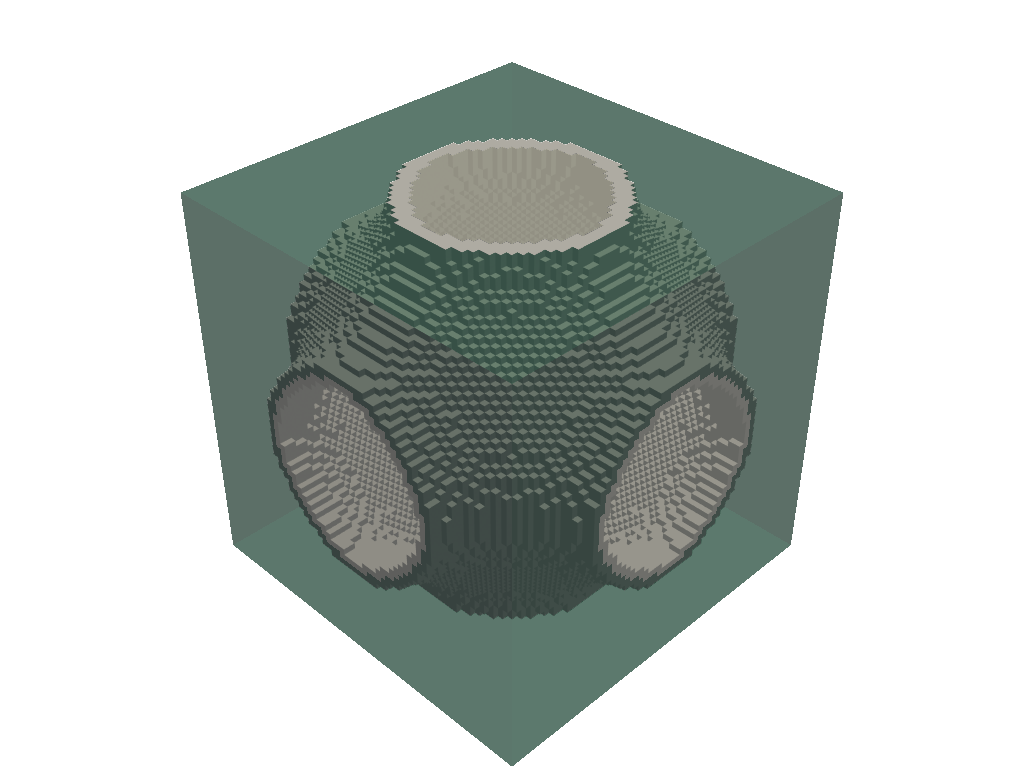

In [7]:
# generate an interactive visualization

pl = pv.Plotter()
pl.add_mesh(mesh,scalars='material',
            cmap='YlGn',
            opacity=0.4,
            show_scalar_bar=False)
pl.add_mesh(mesh.threshold(value=1,scalars='interface'),
            color="#a0a0a0",
            ambient=0.2,
            specular=0.5,
           )

pl.set_background('white')
pl.show()